In [1]:
!pip install transformers
!pip install torch
!pip install matplotlib


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example text
text = "Natural Language Processing (NLP) is a fascinating field of study."

# Tokenize input text
inputs = tokenizer(text, return_tensors='pt')

# Display tokenized input
print("Tokenized input:", inputs)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenized input: {'input_ids': tensor([[  101,  3019,  2653,  6364,  1006, 17953,  2361,  1007,  2003,  1037,
         17160,  2492,  1997,  2817,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [3]:
# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Generate embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Extract the last hidden states
last_hidden_states = outputs.last_hidden_state

print("Last hidden states shape:", last_hidden_states.shape)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Last hidden states shape: torch.Size([1, 16, 768])


In [6]:
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Example texts
texts = [
    "Natural Language Processing (NLP) is a fascinating field of study.",
    "Machine learning provides systems the ability to automatically learn.",
    "I enjoy reading about advances in AI technology."
]

# Generate embeddings for each text
embeddings = [get_embeddings(text) for text in texts]

# Calculate cosine similarity between embeddings
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(torch.stack(embeddings).numpy())

print("Cosine similarities between embeddings:\n", similarities)


Cosine similarities between embeddings:
 [[0.99999994 0.7476222  0.7362643 ]
 [0.7476222  0.99999976 0.7228373 ]
 [0.7362643  0.7228373  1.        ]]


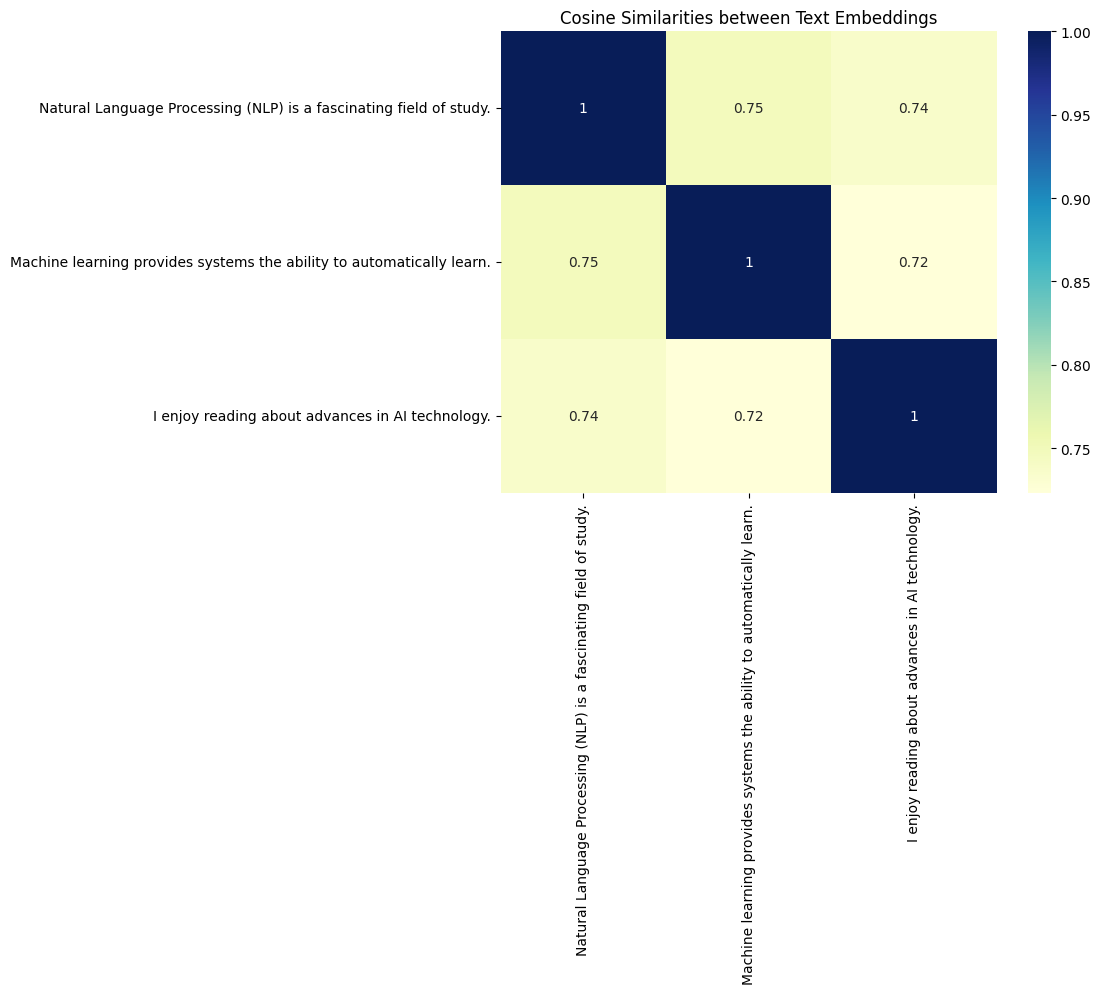

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot heatmap of cosine similarities
plt.figure(figsize=(8, 6))
sns.heatmap(similarities, annot=True, xticklabels=texts, yticklabels=texts, cmap="YlGnBu")
plt.title('Cosine Similarities between Text Embeddings')
plt.show()


In [8]:
# Conclusion and insights
conclusion = """
The BERT model demonstrates a strong ability to understand the context of different sentences.
The cosine similarity between embeddings of related sentences is higher, indicating that BERT
captures the semantic meaning effectively. This analysis shows that BERT can be a powerful tool
for various NLP tasks, including text classification, sentiment analysis, and more.

Future work could involve fine-tuning BERT on domain-specific data to improve its performance
in specialized applications. Additionally, exploring other models like GPT-3 or domain-specific
language models could provide further insights into their strengths and limitations.
"""

print(conclusion)



The BERT model demonstrates a strong ability to understand the context of different sentences.
The cosine similarity between embeddings of related sentences is higher, indicating that BERT
captures the semantic meaning effectively. This analysis shows that BERT can be a powerful tool
for various NLP tasks, including text classification, sentiment analysis, and more.

Future work could involve fine-tuning BERT on domain-specific data to improve its performance
in specialized applications. Additionally, exploring other models like GPT-3 or domain-specific
language models could provide further insights into their strengths and limitations.

